In [1]:
import pandas as pd
from database.connect import getConnection
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
sns.set()

In [2]:
start_date = '01-01-2000'
end_date = '01-01-2023'

# convert start and end date to unix timestamp in milliseconds
start_date_unix = int(datetime.strptime(start_date, '%d-%m-%Y').timestamp() * 1000)
end_date_unix = int(datetime.strptime(end_date, '%d-%m-%Y').timestamp() * 1000)

# create a part you can insert into your where clause
date_restriction = f" AND tweets.timestamp_ms >= {start_date_unix} AND tweets.timestamp_ms <= {end_date_unix}"

In [3]:
try:
    connection = getConnection()
except Exception:
    print("✖️ Error while connecting to MySQL engine database.")
    print("ℹ️ Please make sure the environment file `.env` is located at"+
        "the project root directory and contains proper configuration.")
    raise

cursor = connection.cursor()

In [4]:
cursor.execute(f""" SELECT bs.bin_id, bs.cID, bs.bin_position, bs.break_airline, bs.sentiment_sum, bs.tweet_count, c.Tstart, c.Tend
                    FROM binned_sentiment bs, conversations c
                    WHERE bs.cID = c.id AND bs.break_airline NOT LIKE 'prev=%'""")
binned_sentiment = cursor.fetchall()
#all bins from conversations with more than 1 bin.

Ideas:
df-columns: airline, sentiment avg before and after tweet, timestamp, 

In [5]:
query = """ SELECT bs1.break_airline, (bs1.sentiment_sum / bs1.tweet_count) - (bs2.sentiment_sum / bs2.tweet_count) AS average_sent_diff
            FROM `binned_sentiment` bs1, `binned_sentiment` bs2
            WHERE bs1.cID = bs2.cID AND bs2.bin_position = bs1.bin_position + 1 """
cursor.execute(query)
sentiment_change = cursor.fetchall()

In [11]:
df_sentiment_change = pd.DataFrame(sentiment_change, dtype = float)
df_sentiment_change.rename(columns ={0:"airline",1:"average sentiment change"}, inplace=True)
df_sentiment_change

C:\Users\20213761\AppData\Local\Temp\ipykernel_1068\2436090052.py:1: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df_sentiment_change = pd.DataFrame(sentiment_change, dtype = float)


,airline,average sentiment change
0,easyJet,-0.10
1,easyJet,-0.10
2,easyJet,-0.20
3,easyJet,0.00
4,easyJet,0.00
...,...,...
219158,British_Airways,0.45
219159,British_Airways,0.45
219160,British_Airways,-0.20
219161,easyJet,-0.60


<Axes: xlabel='airline', ylabel='average sentiment change'>

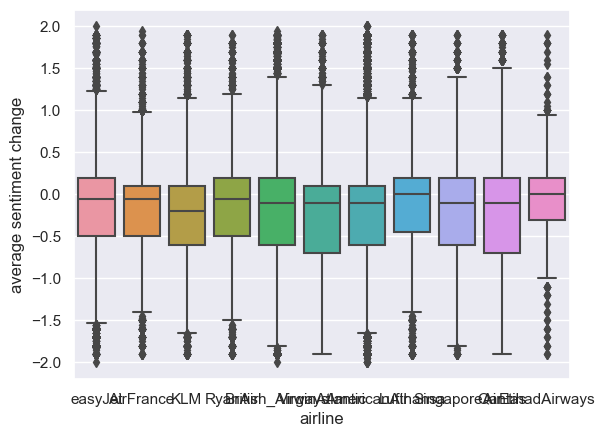

In [22]:
sns.boxplot(data=df_sentiment_change,x='airline',y='average sentiment change')